In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
from PIL import Image, ImageDraw

# Задание 5.1 
Для трех значений порога 70 + No, 140 + No,
210 + No, где No – номер по списку группы, провести пороговую обработку полутонового изображения с плавным изменением интенсивности.

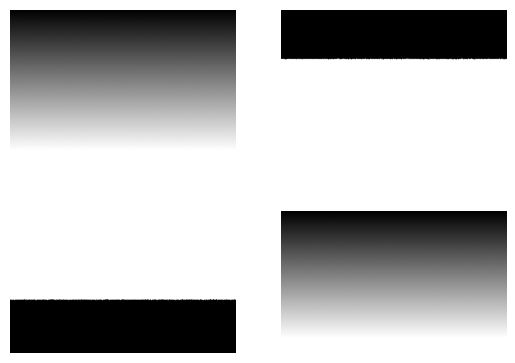

In [2]:
img = cv2.imread ('images/grad.jpg' , 0)

ret, thresh1 = cv2.threshold (
    img, 
    88, 
    255, 
    cv2.THRESH_BINARY
)
ret, thresh2 = cv2.threshold (
    img,
    158,
    255, 
    cv2.THRESH_BINARY_INV
)
ret, thresh3 = cv2.threshold (
    img,
    228,
    255, 
    cv2.THRESH_TRUNC
)

images = [img, thresh1, thresh2, thresh3]

for i, item in enumerate(images):
    plt.subplot(2, 2, i+1), plt.imshow(item, 'gray')
    plt.axis('off')

plt.show()


# Задание 5.2 
Протестировать функции с адаптивным порогом, задавая последовательно два значения порога, примерно 1/3 и 2/3 от максимума интенсивности.

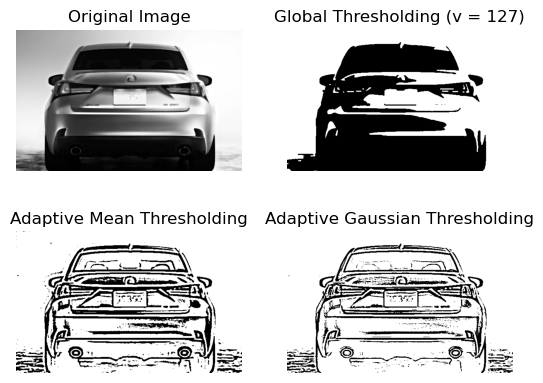

In [3]:
img = cv2.imread('images/lexus.jpg', 0)
img = cv2.medianBlur(img, 5)

ret1, th1 = cv2.threshold(
    img,
    127,
    255,
    cv2.THRESH_BINARY
)
th2 = cv2.adaptiveThreshold(
    img,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)
th3 = cv2.adaptiveThreshold(
    img,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)

titles = [
    'Original Image',
    'Global Thresholding (v = 127)', 
    'Adaptive Mean Thresholding', 
    'Adaptive Gaussian Thresholding'
]
images = [img, th1, th2, th3]

for i, item in enumerate(images):
    plt.subplot(2, 2, i+1), plt.imshow(item, 'gray')
    plt.title(titles[i])
    plt.axis('off')
    

# Задание 5.3 

Загрузить модули cv2, random, PIL. Создать зашумленное изображение.

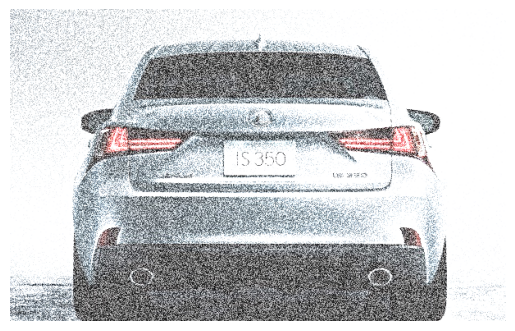

In [4]:
image = Image.open('images/lexus.jpg')
draw = ImageDraw.Draw(image)

width = image.size[0]
height = image.size[1]
pix = image.load()

for i in range(width):
    for j in range(height):
        rand = random.randint(0, 200)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

image.save("images/median.png", "JPEG")

plt.imshow(image);
plt.axis('off')
plt.show();

# Задание 5.4
На вход программы пороговой обработки подается зашумленное изображение. Это изображение обрабатывается тремя способами. В первом случае используется глобальный порог со значением 127. Во втором случае напрямую применяется порог Оцу. В третьем случае изображение сначала удаляет шум фильтром с гауссовым ядром 5x5, затем применяется пороговая обработка Оцу.

In [5]:
img = cv2.imread('images/median.png', 0)

Применим глобальную обработку и обработку Оцу.

In [6]:
ret1, th1 = cv2.threshold(
    img,
    127,
    255,
    cv2.THRESH_BINARY
)
ret2, th2 = cv2.threshold(
    img,
    0,
    255,
    cv2.THRESH_BINARY+cv2.THRESH_OTSU
)


Применим фильтр Гаусса и сделаем обработку Оцу после блюра.

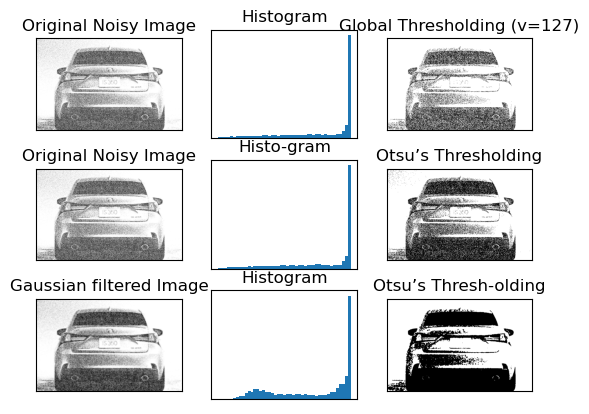

In [7]:
blur = cv2.GaussianBlur(img, (5, 5), 0)

ret3, th3 = cv2.threshold(
    blur,
    0,
    255,
    cv2.THRESH_BINARY+cv2.THRESH_OTSU
)

images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = [
    'Original Noisy Image',
    'Histogram',
    'Global Thresholding (v=127)',
    'Original Noisy Image', 
    'Histo-gram',
    'Otsu’s Thresholding',
    'Gaussian filtered Image',
    'Histogram',
    'Otsu’s Thresh-olding'
]

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]),
    plt.yticks([])
    
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 45)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3, 3,i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]),
    plt.yticks([])
    
plt.show()